#Revisa detenidamente la información y resuelve el proyecto: predicción de retorno de clientes.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV



# Iniciar el proceso ETL Extract, Transform and Load que es comun en todas las herramientas de ciencia de datos e inteligencia de negocios.

# Es voltear a ver la informacion existente de cualquier empresa o conjunto de datos y revisar sus datos históricos por lo regular forman parte de los KPI (key performance index, ventas, costos, produccion, desempeño de empleados, etc)

In [2]:
# 1. Cargar el archivo CSV synthetic_customer_data.csv en un DataFrame usando ETL, Extract
# Solicitar archivos a google colab
from google.colab import files

# Pedir el archivo local data_set_syntheticcsv
synthetic_customer_data = files.upload()

Saving synthetic_customer_data.csv to synthetic_customer_data.csv


In [3]:
# Cargar datos del csv
df = pd.read_csv('synthetic_customer_data.csv')

In [5]:
# mostrar dataframe df
df

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0
...,...,...,...,...,...,...,...,...
95,96,33,Female,240.00,5,7,1,1
96,97,31,Male,305.00,7,9,1,1
97,98,40,Female,215.25,4,14,0,0
98,99,36,Male,185.50,3,20,1,0


In [8]:
# 2. Mostrar información básica del DataFrame, como el tipo de datos de cada columna y calcular estadísticas descriptivas para cada variable.
print("Primeras filas del DataFrame:")
df.head()



Primeras filas del DataFrame:


,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0


In [10]:
# Mostrar información básica y estadísticas descriptivas
print("\nInformación del DataFrame:")
# Mostrr el tipo de datos de cada columna
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


In [11]:
#Mostrar calcular estadísticas descriptivas para cada variable.
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,customer_id,age,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,34.300000,213.250000,4.500000,14.700000,0.600000,0.500000
std,29.011492,6.163595,59.069596,1.507557,7.681146,0.492366,0.502519
min,1.000000,25.000000,120.750000,2.000000,5.000000,0.000000,0.000000
25%,25.750000,29.000000,175.500000,3.000000,9.000000,0.000000,0.000000
50%,50.500000,33.500000,207.875000,4.500000,13.000000,1.000000,0.500000
75%,75.250000,40.000000,240.000000,6.000000,20.000000,1.000000,1.000000
max,100.000000,45.000000,315.000000,7.000000,30.000000,1.000000,1.000000


In [ ]:
# filtrar la columna age
df['age']

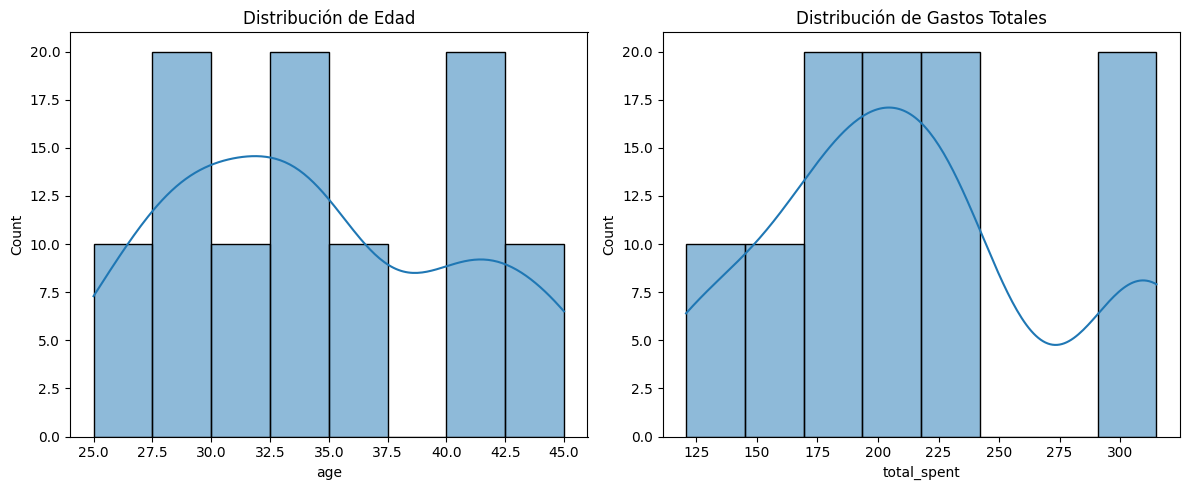

In [15]:
# 3. Visualización de datos
# 	Generar histogramas para analizar la distribución de age y total_spent.
# Histograma de la distribución de 'age' y 'total_spent'

# Creamos figure
plt.figure(figsize=(12, 5))

# Creamos subplot 1 Distribución de Edad (Age)
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribución de Edad')

# Creamos subplot 2 Distribución de Gastos Totales
plt.subplot(1, 2, 2)
sns.histplot(df['total_spent'], kde=True)
plt.title('Distribución de Gastos Totales')

plt.tight_layout()
plt.show()

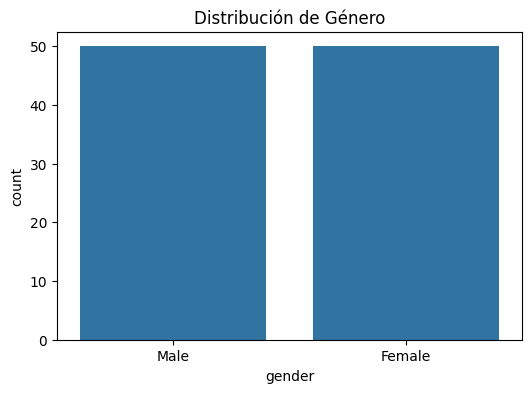

In [16]:
# 	Crear un gráfico de barras para observar la distribución de genero (gender).
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribución de Género')
plt.show()

In [17]:
# 4. Preprocesamiento de datos  usando ETL, Transform
# 	Verificar si existen valores nulos en el conjunto de datos y documentar los resultados.
print("\nValores nulos en el DataFrame:")
df.isnull().sum() #sum permite agrupar las columnas


Valores nulos en el DataFrame:
customer_id                 0
age                         0
gender                      0
total_spent                 0
frequency                   0
days_since_last_purchase    0
marketing_engaged           0
returned_next_month         0
dtype: int64


In [19]:
# 	Codificar la variable gender en valores numéricos (0 para Female, 1 para Male). 4 Revolucion Industrial: Conceptos de tecnologia: Big Data, IoT, Robotics, IA
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # Female -> 0, Male -> 1

In [21]:
# Mostramos todas columnas gender del conjunto de datos
df

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,1,200.50,5,12,1,1
1,2,34,0,120.75,2,30,0,0
2,3,28,1,315.00,6,5,1,1
3,4,45,0,150.00,3,15,1,0
4,5,42,1,175.50,4,25,0,0
...,...,...,...,...,...,...,...,...
95,96,33,0,240.00,5,7,1,1
96,97,31,1,305.00,7,9,1,1
97,98,40,0,215.25,4,14,0,0
98,99,36,1,185.50,3,20,1,0


#En Python, el proceso de escalar las columnas numéricas se refiere a transformar los valores de dichas columnas para que estén en un rango o distribución específica. Esto es particularmente útil en análisis de datos y aprendizaje automático, ya que algunas técnicas y modelos son sensibles a las magnitudes y escalas de los datos.

#¿Por qué es importante escalar las columnas numéricas?
#**Consistencia:** Ayuda a asegurar que todas las características tengan igual peso o importancia.
#**Convergencia más rápida**: En algoritmos de optimización, como en redes neuronales, puede mejorar la velocidad y estabilidad.
#**Mejora del rendimiento**: Modelos y métodos basados en distancias funcionan mejor con datos escalados.

In [22]:
# 	Escalar las columnas numéricas (age, total_spent, frequency, days_since_last_purchase) usando StandardScaler para asegurar consistencia en las escalas.
scaler = StandardScaler()
df[['age', 'total_spent', 'frequency', 'days_since_last_purchase']] = scaler.fit_transform(
    df[['age', 'total_spent', 'frequency', 'days_since_last_purchase']]
)

In [23]:
# Mostrar datos escalados del dataset
df

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,-1.516461,1,-0.216934,0.333333,-0.353281,1,1
1,2,-0.048918,0,-1.573838,-1.666667,2.001925,0,0
2,3,-1.027280,1,1.731222,1.000000,-1.269194,1,1
3,4,1.744746,0,-1.076165,-1.000000,0.039253,1,0
4,5,1.255565,1,-0.642296,-0.333333,1.347701,0,0
...,...,...,...,...,...,...,...,...
95,96,-0.211978,0,0.455137,0.333333,-1.007505,1,1
96,97,-0.538099,1,1.561078,1.666667,-0.745815,1,1
97,98,0.929444,0,0.034029,-0.333333,-0.091591,0,0
98,99,0.277203,1,-0.472152,-1.000000,0.693477,1,0


In [24]:
# 5. Dividir los Datos en Entrenamiento y Prueba:
# 	Definir las características (X) y la variable objetivo (y), que es returned_next_month.

# Define columna y con la columna returmed_next_mont y variable objetivo (y)
y = df['returned_next_month']


In [ ]:
#ver variable y contiene la unica columna returned_next_month
y

In [26]:
# Define columna X t  características (X) sin la columna returned_next_month
X = df.drop(columns=['returned_next_month'])


In [ ]:
#ver variable X todas las columnas y sin columna returned_next_month
X

In [28]:
# 	Dividir los datos en un conjunto de entrenamiento y otro de prueba (80/20).
# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#80% de información ver variable X Data frame shape: 80 filas 7 columnas
from google.colab import data_table
data_table.DataTable(X_train)


In [30]:
#20% ver de información variable X_test Data frame shape: 20 filas 7 columnas
data_table.DataTable(X_test)

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged
83,84,1.744746,0,-1.076165,-1.000000,0.039253,1
53,54,1.744746,0,-1.076165,-1.000000,0.039253,1
70,71,-1.516461,1,-0.216934,0.333333,-0.353281,1
45,46,-0.211978,0,0.455137,0.333333,-1.007505,1
44,45,1.255565,1,-0.642296,-0.333333,1.347701,0
39,40,-0.864220,0,0.199920,1.000000,-0.614970,0
22,23,-1.027280,1,1.731222,1.000000,-1.269194,1
80,81,-1.516461,1,-0.216934,0.333333,-0.353281,1
10,11,-1.516461,1,-0.216934,0.333333,-0.353281,1
0,1,-1.516461,1,-0.216934,0.333333,-0.353281,1


In [31]:
# 6. Entrenamiento de modelos (creacion de variables de los modelos)
# 	Seleccionar tres modelos de clasificación: Regresión Logística, Árbol de Decisión y Bosque Aleatorio.
# Definir los modelos LogisticRegression(Regresión Logística), DecisionTreeClassifier (Árbol de Decisión ), RandomForestClassifier (Bosque Aleatorio)
log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [32]:
# 	Entrenar cada modelo usando los datos de entrenamiento. (tablas: X_train, y_train)

log_reg.fit(X_train, y_train)  # LogisticRegression: log_reg
tree_clf.fit(X_train, y_train) # DecisionTreeClassifier: tree_clf
rf_clf.fit(X_train, y_train)   # RandomForestClassifier: rf_clf

RandomForestClassifier(random_state=42)

In [33]:
#ver parametros utilizados en cada modelo
# LogisticRegression: log_reg
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
# DecisionTreeClassifier: tree_clf
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [35]:
# RandomForestClassifier: rf_clf
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [36]:
# 7. Evaluación Inicial de Modelos:
# 	Evaluar cada modelo en el conjunto de prueba usando métricas de rendimiento: exactitud, precisión, recall, F1 y AUC-ROC.
# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva
    return {
        "Exactitud": accuracy_score(y_test, y_pred),
        "Precisión": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

# Evaluar cada modelo en el conjunto de prueba usando métricas de rendimiento: exactitud, precisión, recall, F1 y AUC-ROC.
print("\nEvaluación de modelos:")
for model_name, model in zip(['Regresión Logística', 'Árbol de Decisión', 'Bosque Aleatorio'],
                             [log_reg, tree_clf, rf_clf]): # LogisticRegression: log_reg, DecisionTreeClassifier: tree_clf, RandomForestClassifier:
    results = evaluate_model(model, X_test, y_test)
    print(f"\n{model_name} - Resultados:")
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")


Evaluación de modelos:

Regresión Logística - Resultados:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1: 1.0000
AUC-ROC: 1.0000

Árbol de Decisión - Resultados:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1: 1.0000
AUC-ROC: 1.0000

Bosque Aleatorio - Resultados:
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1: 1.0000
AUC-ROC: 1.0000


In [37]:
# 8. Optimización del mejor modelo (Modelo seleccionado Bosque Aleatorio 91% de exactitud)
# 	Realizar optimización de hiperparámetros (Grid Search) en el modelo seleccionado (en este caso, Bosque Aleatorio).
# Parámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [38]:
# Mejor modelo tras optimización RandomForestClassifier
best_rf = grid_search.best_estimator_
print("\nMejores parámetros para Bosque Aleatorio:", grid_search.best_params_)



Mejores parámetros para Bosque Aleatorio: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [39]:
# 	Ajustar el modelo con los mejores parámetros encontrados y entrenarlo nuevamente.
# Reentrenar RandomForestClassifier con los mejores parámetros
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [40]:
# 9. Validación y Análisis de Errores
# 	Evaluar el rendimiento del modelo optimizado en el conjunto de prueba con las métricas mencionadas.
# Evaluación en el conjunto de prueba
final_results = evaluate_model(best_rf, X_test, y_test)
print("\nEvaluación del modelo optimizado (Bosque Aleatorio):")
for metric, value in final_results.items():
    print(f"{metric}: {value:.4f}")



Evaluación del modelo optimizado (Bosque Aleatorio):
Exactitud: 1.0000
Precisión: 1.0000
Recall: 1.0000
F1: 1.0000
AUC-ROC: 1.0000


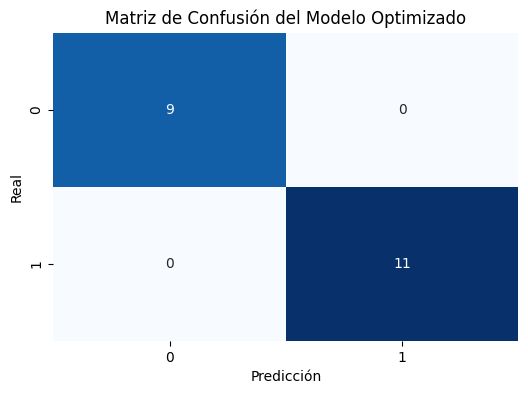

In [42]:

# 	Generar la matriz de confusión para identificar y analizar los errores de clasificación.
# Matriz de confusión
y_pred_best = best_rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Modelo Optimizado')
plt.show()

#Conclusión y recomendaciones
# 1. El modelo Bosque Aleatorio optimizado tuvo el mejor rendimiento en todas las métricas (exactitud, precisión, recall, F1 y AUC-ROC).

#2. Las características más importantes para predecir si un cliente regresará el próximo mes fueron:
   - age
   - total_spent
   - frequency
   - days_since_last_purchase

#3. Este modelo puede ser usado para estrategias de retención, como enviar ofertas personalizadas a clientes con alta probabilidad de regresar, para mejorar su lealtad con la empresa, compañia o marca

#Finalmente, concluimos que el modelo optimizado hace un buen trabajo prediciendo si un cliente volverá. Usamos esta información para sugerir estrategias para mantener contentos a los clientes y hacer que regresen.
